# Risk

Humanity has always been a species concerned with its legacy. The idea of bequest—leaving something meaningful for the next generation—has defined civilizations. Historically, this inheritance was wrought through sweat and sacrifice: parents toiled, learned through failure, and endured hardship to ensure their children might live better lives. This progression wasn’t linear but marked by slow gains, where the cost of each advance was borne in blood, labor, and time. Parents, in this sense, were not only biological progenitors but the very means of progress. They embodied the work, the trial and error, and the steady march forward.

Now, however, we stand at a precipice that redefines this relationship between ends, means, and cost. The tools of progress have shifted dramatically. Parallel computing, GPUs, and the monumental processing power of AI are not merely augmentations of human effort; they are replacements for many aspects of it. Trial and error, once the domain of human experience, is now handled at speeds and scales beyond comprehension. Machines iterate faster, deeper, and with greater precision than any individual or generation of humans could.

This means that the bequest we offer to the next generation will be unprecedented in its magnitude. It will not be the modest inheritance of wisdom, wealth, or infrastructure that parents once passed down. Instead, it will be exponential—a wealth of knowledge, computational power, and technological capability that dwarfs anything our ancestors could have imagined. In theory, this should herald a golden age for humanity. The cost of this bequest, traditionally borne by the toiling parent, is now minimal when machines handle the burden of experimentation and learning. Parents—humanity itself—become facilitators rather than laborers.

Yet, the central irony of this transformation lies in its guardians. The systems that generate this exponential wealth are not owned or controlled by humanity as a whole. They are concentrated in the hands of a few: corporations, nations, and elites who act as gatekeepers. While the potential for abundance exists, the reality is an amplification of inequality. Just as the exponential power of technology grows, so too does the disparity between those who control it and those who do not. The bequest, far from being a universal inheritance, risks becoming a privilege reserved for the few, while the majority are left in the shadow of this technological revolution.

This creates a paradox. Humanity’s greatest achievement—the ability to create unimaginable wealth without traditional cost—may simultaneously undermine its social fabric. Inequalities that once expanded gradually now threaten to spiral out of control, dividing nations and humanity into technological haves and have-nots on a scale never seen before. The guardians of this process hold immense power, and the decisions they make will shape not just the inheritance itself but the terms of who benefits from it.

In this new paradigm, we must confront uncomfortable questions: Can a bequest created without cost still be justified if its distribution perpetuates injustice? Can humanity call itself a species that values its offspring when the fruits of its greatest advances are hoarded rather than shared? And most crucially, who decides what is to be done with this exponential wealth—the few or the many?

The answers to these questions will define whether humanity’s legacy is one of shared progress or deepening division.



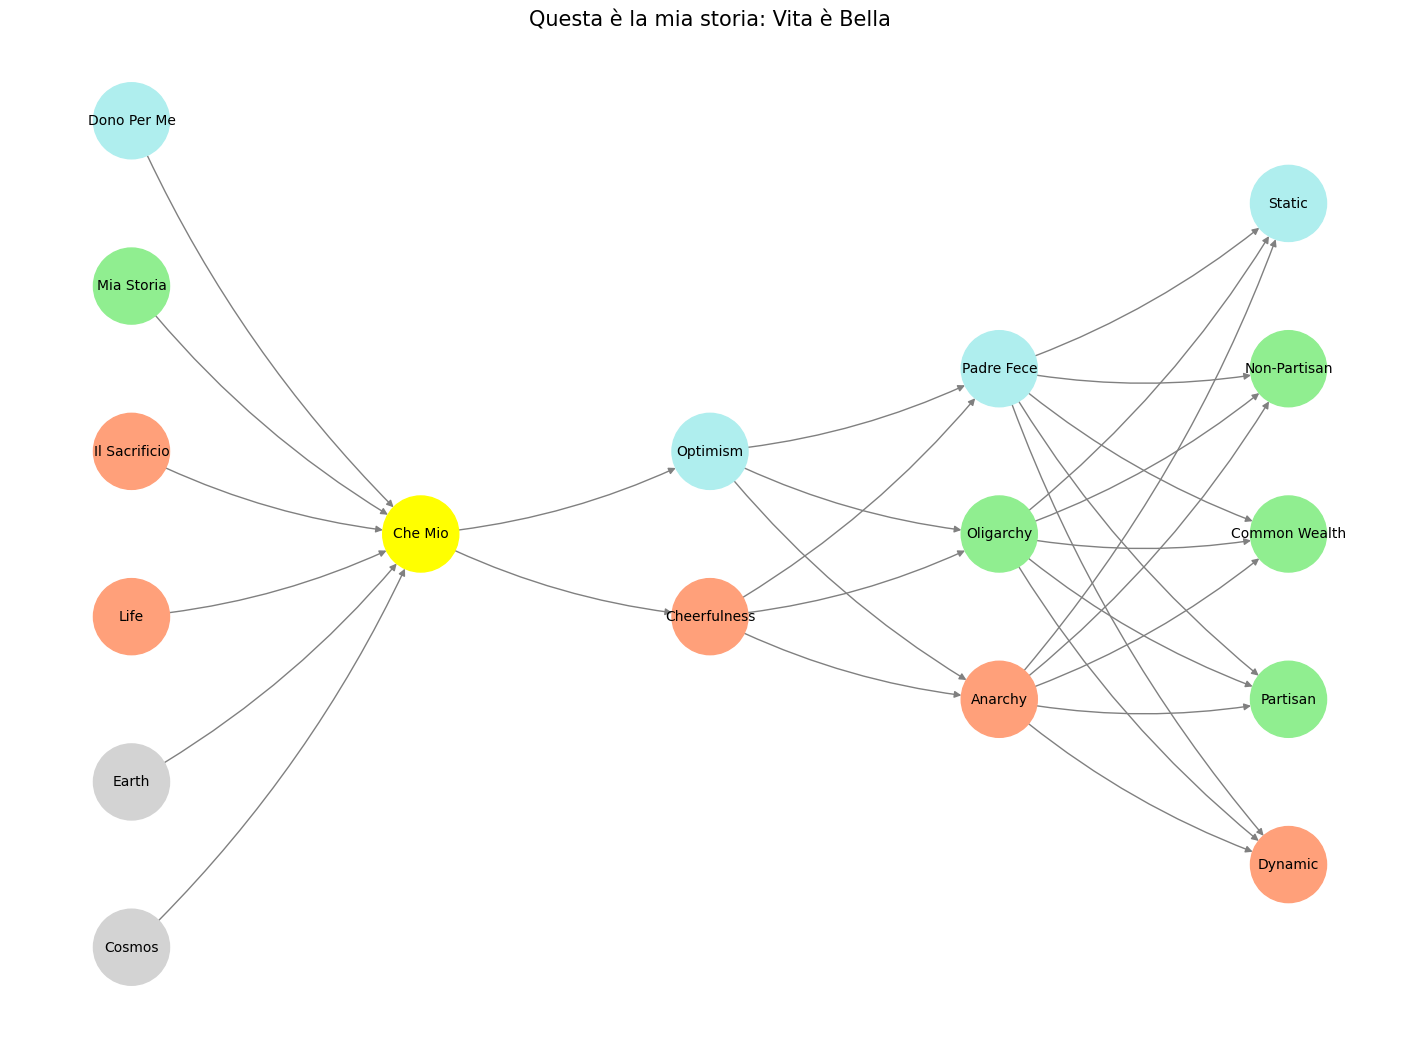

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        # Divine and narrative framework in the film
        'World': [
            'Cosmos',  # Guido’s grand, universal sense of play and creativity
            'Earth',  # The tangible and oppressive reality of the Holocaust
            'Life',  # The stakes of survival and human connection
            'Il Sacrificio',  # Guido’s ultimate sacrifice
            'Mia Storia',  # Giosuè’s personal narrative, shaped by his father
            'Dono Per Me'  # The "gift" of innocence and joy given by Guido
        ],
        # Perception and filtering of reality
        'Perception': ['Che Mio'],  # How Giosuè interprets his father’s actions and words
        # Agency and Guido’s defining traits
        'Agency': ['Cheerfulness', 'Optimism'],  # Guido’s tools for shaping the narrative
        # Generativity and legacy
        'Generativity': [
            'Anarchy',  # Guido’s rebellion against oppressive reality
            'Oligarchy',  # The systemic constraints he navigates
            'Padre Fece'  # The actions and sacrifices Guido made for his son
        ],
        # Physical realities and their interplay
        'Physicality': [
            'Dynamic',  # Guido’s improvisational actions, like creating the “game”
            'Partisan',  # The direct oppression he faces
            'Common Wealth',  # Shared humanity and joy despite hardship
            'Non-Partisan',  # Universal themes transcending sides
            'Static'  # The immovable, tragic finality of the Holocaust
        ]
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Che Mio':
        return 'yellow'  # Perception as the interpretive bridge
    if layer == 'World' and node == 'Dono Per Me':
        return 'paleturquoise'  # Optimism and the "gift"
    if layer == 'World' and node == 'Mia Storia':
        return 'lightgreen'  # Harmony and legacy
    if layer == 'World' and node in ['Cosmos', 'Earth']:
        return 'lightgray'  # Context of divine and tangible
    elif layer == 'Agency' and node == 'Optimism':
        return 'paleturquoise'  # Guido’s defining hope
    elif layer == 'Generativity':
        if node == 'Padre Fece':
            return 'paleturquoise'  # Guido’s ultimate acts of selflessness
        elif node == 'Oligarchy':
            return 'lightgreen'  # Navigating systemic structures
        elif node == 'Anarchy':
            return 'lightsalmon'  # Rebellion and creativity
    elif layer == 'Physicality':
        if node == 'Static':
            return 'paleturquoise'  # The unchanging, tragic realities
        elif node in ['Non-Partisan', 'Common Wealth', 'Partisan']:
            return 'lightgreen'  # Shared humanity and resilience
        elif node == 'Dynamic':
            return 'lightsalmon'  # Guido’s improvisation and vitality
    return 'lightsalmon'  # Default color for tension or conflict

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges (without weights)
    for layer_pair in [
        ('World', 'Perception'),  # Giosuè interprets the "World" through "Che Mio"
        ('Perception', 'Agency'),  # Guido’s cheerfulness shapes Giosuè’s perception
        ('Agency', 'Generativity'),  # Guido’s optimism drives his generative actions
        ('Generativity', 'Physicality')  # His legacy plays out in the physical world
    ]:
        source_layer, target_layer = layer_pair
        for source in layers[source_layer]:
            for target in layers[target_layer]:
                G.add_edge(source, target)

    # Draw the graph
    plt.figure(figsize=(14, 10))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, connectionstyle="arc3,rad=0.1"
    )
    plt.title("Questa è la mia storia: Vita è Bella", fontsize=15)
    plt.show()

# Run the visualization
visualize_nn()


```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
_G1-G3: Ganglia & N1-N5 Nuclei_. These are cranial nerve, dorsal-root (G1 & G2); basal ganglia, thalamus, hypothalamus (N1, N2, N3); and brain stem and cerebelum (N4 & N5).
```
      

 

#
